# Data Science’s First Classifier: The Perceptron

Welcome! This notebook explores the foundational machine learning algorithm known as the **Perceptron** — the first model capable of learning to classify data.

In this notebook, we will:

- Briefly review how the Perceptron works.
- Apply it to a **simple, artificial dataset** to visualize learning behavior.
- Test it on the classic **Iris dataset** to see how it performs on real-world data.

Although the Perceptron is limited to **linearly separable data**, its core concepts laid the groundwork for modern classification models in data science — including neural networks and deep learning.


Import libraries that we will use later:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

Get the our example dataset:

In [2]:
df = pd.read_csv("example_dataset.csv")
df

,x1,x2,y
0,-3.424623,-2.661550,-1
1,3.881390,3.572178,1
2,-1.468723,-4.562649,-1
3,3.507807,3.322148,1
4,-1.748541,-3.320168,-1
...,...,...,...
95,3.720014,4.034261,1
96,1.618212,2.974452,1
97,3.540544,2.482833,1
98,-1.177353,-1.604099,-1


Visualize the data:

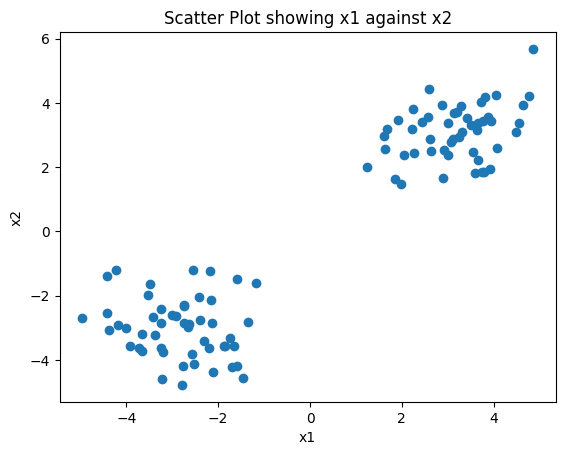

In [3]:
# Create the scatter plot
plt.scatter(df["x1"], df["x2"])

# Add labels and title (optional)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter Plot showing x1 against x2")

# Display the plot
plt.show()

# 1. Implementation of Perceptron

Here is our mathematical formula:

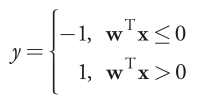

**The Algorithm (conceptual):**

1. Make a prediction
2. Compare it to the true label
3. If wrong, adjust weights to reduce the error
4. Repeat across the dataset

Let's now write the code for the algorithm

In [4]:
def Perceptron(data, label, split_size=0.2):
    # First, we have to separate our dataframe into our x and y variables for training
    # Get our x and y vectors 
    y = data[label].to_numpy()
    x = data.drop(label, axis=1).to_numpy()
    
    # Then we need to add the bias. This will be added as "1" as the first element of **x** and "0" as the first element of **w**
    # Step 1: Add a column of 1s to our x and initialize the weight vector to zero
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    w = np.zeros(x.shape[1])  # shape = (3,)
    
    # split data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=split_size, random_state=4)
    print ('Train set:', x_train.shape,  y_train.shape)
    print ('Test set:', x_test.shape,  y_test.shape)
    
    # Set an epoch to limit how many times it will loop
    epoch = 0
    
    while epoch < 100:
        update = 0  # start with no update
        # Step 2: For each data point x in the training dataset, do the following
        for i in range(len(x_train)):
            # Carry out product of y and (wt * x)
            y_wt_x = y_train[i] * np.dot(w, x_train[i])
            # If the weight vector is wrong, so update it:
            if y_wt_x <= 0:
                w = w + y_train[i] * x_train[i]
                update = 1
        # Step 3: . If there were no updates to the weight vector in Step 2, terminate; otherwise, go to Step 2
        # and iterate over all the data points once again.
        if update == 0:
            print(f"Training complete after {epoch} epochs.")
            break
        epoch += 1
    
    print(f"These are the weights, w: {w}")
    
    # Step 2. Check Model Accuracy:
    # Compute the dot product:
    score = np.dot(x_test, w)
    # Apply the sign function:
    y_pred = np.sign(score)
    # Find score:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100}%")
    return w, accuracy

## Run the Perceptron:

In [5]:
w, accuracy = Perceptron(df, "y")

Train set: (80, 3) (80,)
Test set: (20, 3) (20,)
Training complete after 1 epochs.
These are the weights, w: [1.         4.05181224 4.24867348]
Model Accuracy: 100.0%


# 3. Visualize the results:

We are going to plot the decision boundary across the **entire** dataset. This means that even the training data will be included.

Linear equation of the decision boundary:

w₀ + w₁*x₁ + w₂*x₂ = 0


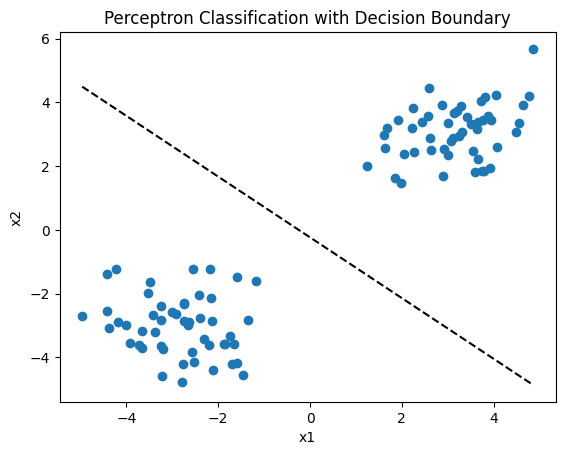

In [6]:
# Create the scatter plot
plt.scatter(df["x1"], df["x2"])

# Plot decision boundary
x1_vals = np.linspace(df["x1"].min(), df["x1"].max(), 100)
w0, w1, w2 = w  # unpack the weights
x2_vals = -(w0 + w1 * x1_vals) / w2

plt.plot(x1_vals, x2_vals, 'k--', label='Decision boundary')

# Add labels and title (optional)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Perceptron Classification with Decision Boundary")

# Display the plot
plt.show()

# 4. Implement Perceptron with the Iris Dataset:

We will try to test the model on the Iris dataset with more features

In [7]:
# Load the Iris dataset
iris = load_iris()
df2 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Include the "target" column. This is our "y".
df2['target'] = iris.target
iris_df = df2[["sepal length (cm)", "sepal width (cm)", "target"]]
iris_df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2







Let's see how many classes we have. This is important because the Perceptron only works with 2 classes.

In [8]:
iris_df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Let's remove the class with name "2"

In [9]:
mask = iris_df['target'] != 2
ir_df2 = iris_df[mask]
ir_df2['target'].value_counts()

target
0    50
1    50
Name: count, dtype: int64

Next, we need to give our target column values of (-1, 1) instead of (0, 1).

In [10]:
iris_ready = ir_df2.replace({0: -1})
iris_ready

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


In [11]:
w_iris, accuracy_iris = Perceptron(iris_ready, "target")

Train set: (80, 3) (80,)
Test set: (20, 3) (20,)
Training complete after 5 epochs.
These are the weights, w: [ -1.   13.9 -24. ]
Model Accuracy: 95.0%


# 5. Visualize the results:

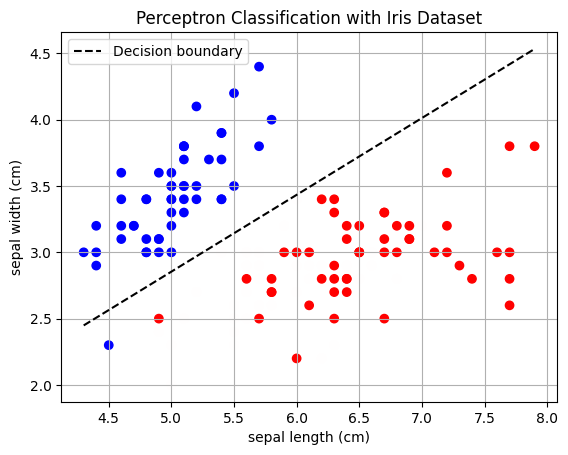

In [12]:
# Create the scatter plot
plt.scatter(iris_df["sepal length (cm)"], iris_df["sepal width (cm)"], c=iris_df["target"], cmap="bwr")

# Generate x₁ values for plotting
x1_vals = np.linspace(iris_df["sepal length (cm)"].min(), iris_df["sepal length (cm)"].max(), 100)

# Unpack trained weights
w0, w1, w2 = w_iris

# Compute decision boundary
x2_vals = -(w0 + w1 * x1_vals) / w2

# Plot the decision boundary
plt.plot(x1_vals, x2_vals, 'k--', label='Decision boundary')

# Add labels and title
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Perceptron Classification with Iris Dataset")
plt.legend()
plt.grid(True)
plt.show()
